# AWS and `boto3`

![cloud](https://source.unsplash.com/FIKD9t5_5zQ)

Picture by [@wirhabenzeit](https://unsplash.com/@wirhabenzeit)

## 1. Objectives

The official Python [SDK](https://en.wikipedia.org/wiki/Software_development_kit) for interacting with any resource from AWS is the `boto3` package.

In this exercice, you will 
- Learn the basic of this library for interacting with S3, the popular AWS cloud storage solution
- Use `requests` as a refresher, to download an image from the wirhabenzeit
- Use `boto3` to upload this image in an S3 bucket

----


In [2]:
!pip install boto3

     |████████████████████████████████| 130 kB 7.6 MB/s eta 0:00:01
  Using cached s3transfer-0.3.3-py2.py3-none-any.whl (69 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
     |████████████████████████████████| 7.2 MB 8.9 MB/s eta 0:00:01


In [3]:
# TODO: import `boto3` and `requests`
### BEGIN STRIP ###

import boto3
import requests

### END STRIP ###

Today, we will use a `session` object to store our AWS credentials. The `session` object can be used exactly as if you were using the `client` and `resource` object directly, as you can see [here](https://boto3.amazonaws.com/v1/documentation/api/latest/guide/session.html).

**NOTE**

Writing access keys and secret directly in your code is a very, _very_, **very** bad idea. We do that today to simplify the global process, but there are [better ways](https://towardsdatascience.com/how-to-hide-your-api-keys-in-python-fb2e1a61b0a0).

In [4]:
# TODO: create a `boto3.Session()` object called `sessions`, using your credentials
### BEGIN STRIP ###

s3 = boto3.resource("s3")
s3.create_bucket(Bucket="tibo-jedha-cloud-storage")
s3.create_bucket(Bucket="tibo-jedha-datasets")

### END STRIP ###

s3.Bucket(name='tibo-jedha-datasets')

## 2. First steps with `boto3`

**`boto3` is a full-featured library that enables developpers to interact with their entire AWS infrastructure with Python.**

Today, we will only focus on [AWS S3](https://aws.amazon.com/s3/), the cloud storage solution from Amazon. 

You can read the `boto3` documentation regarding S3 [here](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html).

### The `client` object

The first lines of the documentation gives you the methods available for the low-level `client` object. [docs](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#client).

To start, try to list all the buckets names using a `session.client('s3')` object.

In [9]:
# TODO: List all the S3 buckets namesin our AWS account using the low-level `client` api
### BEGIN STRIP ###

s3_client = boto3.client('s3')
response = s3_client.list_buckets()
  
for bucket in response['Buckets']:
    print(f'{bucket["Name"]}')

### END STRIP ###

tibo-jedha-cloud-storage
tibo-jedha-datasets


Using the `client` API can be tedious, as it is a light wrapper around the AWS REST API. From now on, we'll use a `resource` object to interact with S3. 

If you need more information about the `client` and the `resource` object, have a look at [this StackOverflow post](https://stackoverflow.com/questions/42809096/difference-in-boto3-between-resource-client-and-session).


### The `resource` object

For easier code, we will use the [`resource`](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#service-resource) object.

You can [follow the documentation](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#service-resource) to learn what are the useful subresources (most importantly `Bucket` and `Object`) and their respective actions.

In [10]:
# TODO: create a S3 `resource` object called `s3`
### BEGIN STRIP ###

s3 = boto3.resource("s3")

### END STRIP ###

# TODO: Use the `s3` object, and list all the buckets name
### BEGIN STRIP ###

for bucket in s3.buckets.all():
    print(bucket.name)

### END STRIP ###

tibo-jedha-cloud-storage
tibo-jedha-datasets


After reading the `Bucket` part of the documentation, you are ready to create your Python object representing the S3 bucket called `jedha-cloud-storage`.

In [12]:
# TODO: create a `Bucket` instance called `bucket`, representing `jedha-cloud-storage` bucket
### BEGIN STRIP ###

bucket = s3.Bucket("tibo-jedha-cloud-storage")

### END STRIP ###
bucket

s3.Bucket(name='tibo-jedha-cloud-storage')

## 3. Download an image from the web

Using the `requests` library ([docs](https://requests.kennethreitz.org/en/master/)) we are going to download a picture from the web. Now, we ask you to fetch the picure located at a given URL, and store its binary content in a variable called `picture_data`.

Right after you do that, we will store this data in our S3 bucket. How cool is that? :)

In [15]:
picture_url = 'https://cdn.pixabay.com/photo/2016/09/04/20/09/mountains-1645078_960_720.jpg'

# TODO: Download a picture and store its binary content in a `picture_data` variable
### BEGIN STRIP ###

picture_data = requests.get(picture_url).content

### END STRIP ###

Now that we have downloaded our picture, let's display it directly to see what does it look like:

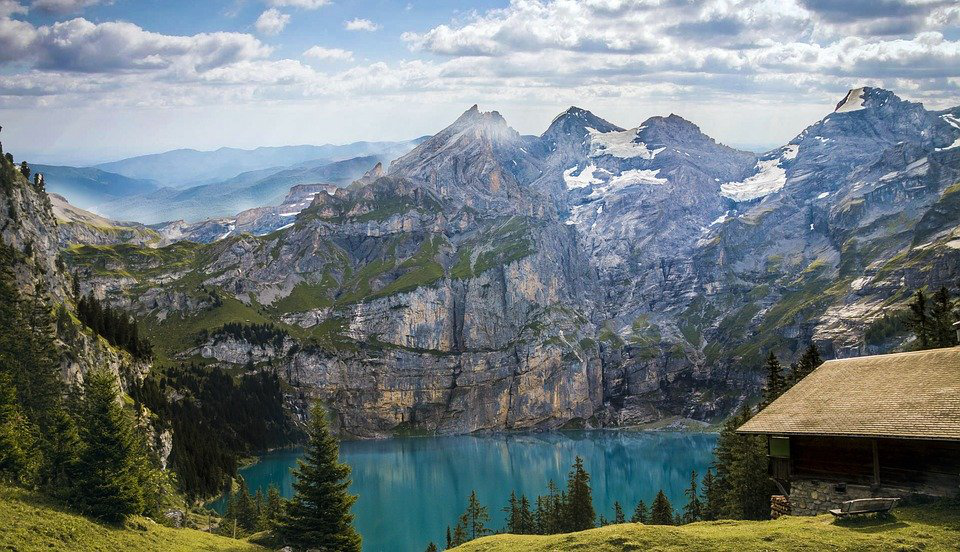

In [16]:
from io import BytesIO
from PIL import Image

from IPython.display import display

stream = BytesIO(picture_data)
with Image.open(stream) as img:
    display(img)

## 4. Upload the picture in an S3 Bucket

`picture_data` is a variable that contains all the bytes composing the beautiful JPG picture you've downloaded from Pixabay.

The next step of this exercice consists of uploading that picture onto S3, under a storage key (the equivalent of a filepath) of your own. You can achieve this result with [several options](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#S3.Bucket)... Considering that the picture's data is currently in memory (as opposed to _on disk_), there is a preferable solution. 

Which one do you think it is?

When you have found the appropriate solution, implement it below.

**NOTE** We ask you to store the object as _private_. Anyone that does not have the appropriate permissions should not be able to read the file. Read carefully the documentation, everything is in there ;)

In [17]:
# TODO: Upload that data to S3, under the key `images/{{ your-name }}/mountain.jpg` as a private object.
# For instance, if your name is Paul McCartney, your storage key is `images/paul-mccartney/mountain.jpg`
### BEGIN STRIP ###

bucket.put_object(Key="images/thibaud-chevrier/mountain.jpg", Body=picture_data)

### END STRIP ###

s3.Object(bucket_name='tibo-jedha-cloud-storage', key='images/thibaud-chevrier/mountain.jpg')

### Check the content of the S3 bucket

Print all the names (or, to be more specific, all the **keys**) of the objects stored in the bucket to ensure you've successfully uploaded the picture.

In [19]:
# TODO: print all the bucket's objects keys
### BEGIN STRIP ###

for file in bucket.objects.all():
    print(file.key)

### END STRIP ###

images/thibaud-chevrier/mountain.jpg


If you see your image storage key, you win!


## 5. Download data from S3

You have just learned how to upload data to S3, why don't we see now how to download data stored in a bucket?

The last part of the exercice consists of downloading the picture you just uploaded, and to store it in your local filesystem, under the path `/tmp/mountain.jpg`

Once it is done, you will have to check that the picture matches exactly the one you have downloaded earlier from Pixabay.

----

There are several ways to download an object from S3 using `boto3`. For a very light object such as your mountain picture, the easiest way is probably the bucket's method object [download_file()](https://boto3.amazonaws.com/v1/documentation/api/latest/reference/services/s3.html#S3.Bucket.download_file)

In [20]:
# TODO: download your picture from S3, and store it in your local filesystem under the path `/tmp/mountain.jpg`
### BEGIN STRIP ###

bucket.download_file("images/thibaud-chevrier/mountain.jpg", '/tmp/mountain.jpg')

### END STRIP ###

Now that you have downloaded the image to your filesystem, let's check that it is the same image you have uploaded a few minutes ago.

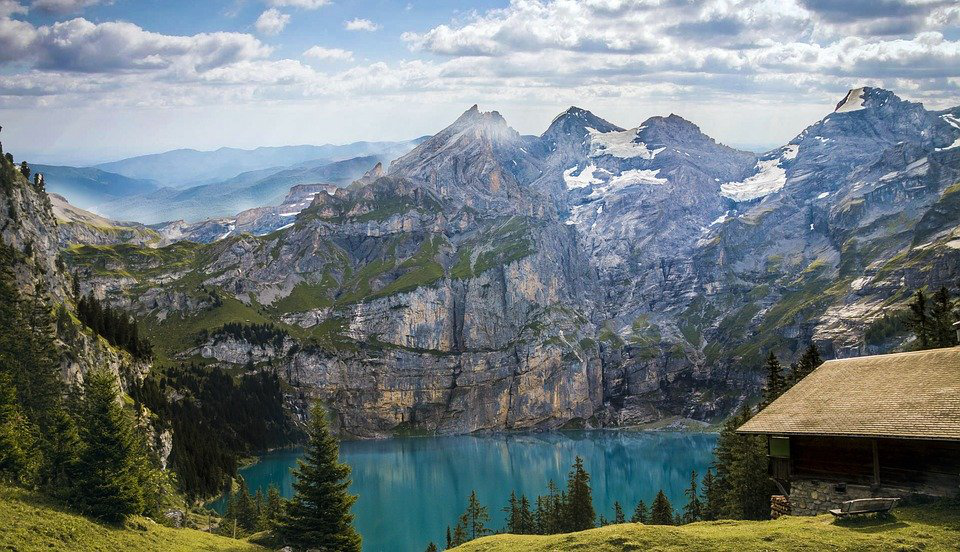

In [21]:
with Image.open('/tmp/mountain.jpg') as img:
    display(img)

In [25]:
import os

if os.path.isfile('/tmp/mountain.jpg'):
    os.remove('/tmp/mountain.jpg')

for bucket in s3.buckets.all():
    bucket.objects.all().delete()
    bucket.delete()

## 6. Summing up

In this exercice, you learned the basic of the `boto3` library for uploading and downloading an object to/from an S3 bucket. You also had a quick refresher on how `requests` work, and how you can manipulate binary data from the web.

![not-too-bad](https://media.giphy.com/media/ENagATV1Gr9eg/giphy.gif)
